In [ ]:
#

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df=pd.read_excel('data.xlsx')

In [ ]:
df.head()

,Engine Speed (RPM),Fuel,Spark Timing (Degree),Power (W),Fuel consumption
0,1000,Ethanol,5,9489.8,422.59
1,2000,Ethanol,5,19219.0,434.85
2,3000,Ethanol,5,27882.0,455.98
3,4000,Ethanol,5,34918.0,484.96
4,5000,Ethanol,5,39814.0,525.85


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df3=pd.get_dummies(df,drop_first=True)

In [ ]:
df3

,Engine Speed (RPM),Spark Timing (Degree),Power (W),Fuel consumption,Fuel_Gasoline
0,1000,5,9489.8,422.59,0
1,2000,5,19219.0,434.85,0
2,3000,5,27882.0,455.98,0
3,4000,5,34918.0,484.96,0
4,5000,5,39814.0,525.85,0
...,...,...,...,...,...
139,4000,45,49252.0,216.05,1
140,5000,45,60300.0,216.43,1
141,6000,45,68373.0,221.49,1
142,7000,45,70748.0,235.22,1


In [ ]:
x=df3[['Engine Speed (RPM)','Spark Timing (Degree)','Fuel_Gasoline']]

In [ ]:
y=df3[['Power (W)']]

In [ ]:
x_train1,x_test1,y_train,y_test=train_test_split(x,y,random_state=25,test_size=0.2,stratify=df3.Fuel_Gasoline)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train = scaler.fit_transform(x_train1)
#X_valid = scaler.transform(X_valid)
x_test = scaler.transform(x_test1)

In [ ]:
model = Sequential(
    [
        tf.keras.Input(shape=(3,)),    #specify input size
        ### START CODE HERE ###
        tf.keras.layers.Dense(30, activation="relu"),
        #tf.keras.layers.Dense(10, activation="leaky_relu"),
        tf.keras.layers.Dense(25, activation="relu"),
        #tf.keras.layers.Dense(5, activation="relu"),
        tf.keras.layers.Dense(1, activation="linear")
        ### END CODE HERE ###
    ], name = "my_model"
)

In [ ]:
model.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.RMSprop(0.008),
)

model.fit(
    x_train,y_train,
    epochs=1000,batch_size=32
)

Epoch 1/1000
4/4 [==============================] - 5s 6ms/step - loss: 41401.6992
Epoch 2/1000
4/4 [==============================] - 0s 4ms/step - loss: 41397.2344
Epoch 3/1000
4/4 [==============================] - 0s 4ms/step - loss: 41389.9648
Epoch 4/1000
4/4 [==============================] - 0s 4ms/step - loss: 41379.8008
Epoch 5/1000
4/4 [==============================] - 0s 4ms/step - loss: 41366.6523
Epoch 6/1000
4/4 [==============================] - 0s 4ms/step - loss: 41350.3711
Epoch 7/1000
4/4 [==============================] - 0s 4ms/step - loss: 41330.8945
Epoch 8/1000
4/4 [==============================] - 0s 4ms/step - loss: 41307.8867
Epoch 9/1000
4/4 [==============================] - 0s 4ms/step - loss: 41281.1758
Epoch 10/1000
4/4 [==============================] - 0s 4ms/step - loss: 41250.9688
Epoch 11/1000
4/4 [==============================] - 0s 4ms/step - loss: 41217.1914
Epoch 12/1000
4/4 [==============================] - 0s 5ms/step - loss: 41179.3789
E

In [ ]:
prediction_train = model.predict(x_train)  # a zero
prediction_test = model.predict(x_test)

1/1 [==============================] - 0s 19ms/step


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
yy1=y_test['Power (W)'].values
#yy2=y_test['Fuel consumption'].values
yy3=np.sort(yy1)
#yy4=np.sort(yy2)

In [ ]:
yz1=prediction_test[:,0]
#yz2=prediction_test[:,1]

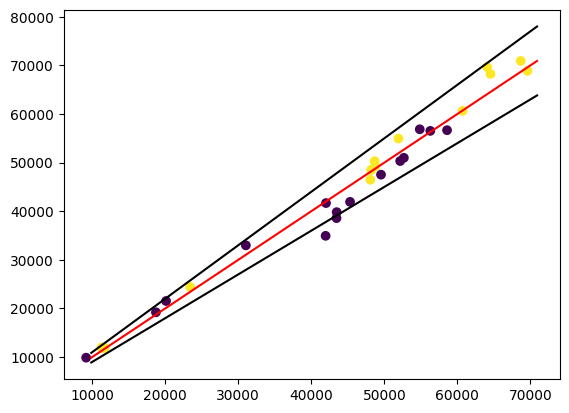

In [ ]:
plt.scatter(yz1,yy1,c=x_test1.Fuel_Gasoline)
plt.plot(yy3,yy3,c='r')
plt.plot(yy3,1.1*yy3,c='black')
plt.plot(yy3,0.9*yy3,c='black')

In [ ]:
r2_score(yz1,yy1)

0.9797139474193015

In [ ]:
y1=df3[['Fuel consumption']]

In [ ]:
x_train1,x_test1,y_train,y_test=train_test_split(x,y1,random_state=25,test_size=0.2,stratify=df3.Fuel_Gasoline)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train = scaler.fit_transform(x_train1)
#X_valid = scaler.transform(X_valid)
x_test = scaler.transform(x_test1)

In [ ]:
model1 = Sequential(
    [
        tf.keras.Input(shape=(3,)),    #specify input size
        ### START CODE HERE ###
        tf.keras.layers.Dense(30, activation="relu"),
        #tf.keras.layers.Dense(10, activation="leaky_relu"),
        tf.keras.layers.Dense(25, activation="relu"),
        #tf.keras.layers.Dense(5, activation="relu"),
        tf.keras.layers.Dense(2, activation="linear")
        ### END CODE HERE ###
    ], name = "my_model1"
)

In [ ]:
model1.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.RMSprop(0.008),
)

model1.fit(
    x_train,y_train,
    epochs=1000,batch_size=32
)

Epoch 1/1000
4/4 [==============================] - 2s 6ms/step - loss: 348.7674
Epoch 2/1000
4/4 [==============================] - 0s 6ms/step - loss: 346.5298
Epoch 3/1000
4/4 [==============================] - 0s 5ms/step - loss: 342.6667
Epoch 4/1000
4/4 [==============================] - 0s 6ms/step - loss: 336.8493
Epoch 5/1000
4/4 [==============================] - 0s 4ms/step - loss: 328.8892
Epoch 6/1000
4/4 [==============================] - 0s 5ms/step - loss: 318.8511
Epoch 7/1000
4/4 [==============================] - 0s 5ms/step - loss: 306.7190
Epoch 8/1000
4/4 [==============================] - 0s 5ms/step - loss: 292.1999
Epoch 9/1000
4/4 [==============================] - 0s 6ms/step - loss: 275.3368
Epoch 10/1000
4/4 [==============================] - 0s 5ms/step - loss: 256.1418
Epoch 11/1000
4/4 [==============================] - 0s 6ms/step - loss: 234.3191
Epoch 12/1000
4/4 [==============================] - 0s 5ms/step - loss: 209.8245
Epoch 13/1000
4/4 [======

In [ ]:
prediction_train = model1.predict(x_train)  # a zero
prediction_test = model1.predict(x_test)

1/1 [==============================] - 0s 29ms/step


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
yy1=y_test['Fuel consumption'].values
#yy2=y_test['Fuel consumption'].values
yy3=np.sort(yy1)
#yy4=np.sort(yy2)

In [ ]:
yz1=prediction_test[:,0]
#yz2=prediction_test[:,1]

In [ ]:
r2_score(yy1,yz1)

0.983104257703996

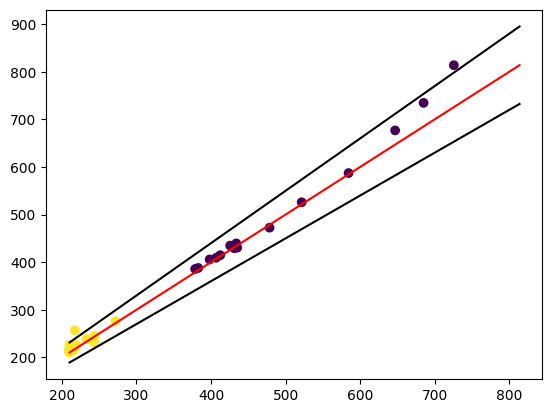

In [ ]:
plt.scatter(yz1,yy1,c=x_test1.Fuel_Gasoline)
plt.plot(yy3,yy3,c='r')
plt.plot(yy3,1.1*yy3,c='black')
plt.plot(yy3,0.9*yy3,c='black')